## 회귀분석의 가정

In [12]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# 데이터 생성
np.random.seed(0)
X = np.random.rand(100) * 10  # 독립변수 X
y = 2 * X + 1 + np.random.normal(0, 2, 100)  # 종속변수 y, 약간의 노이즈 추가

# X와 y를 데이터프레임으로 변환
data = pd.DataFrame({'X': X, 'y': y})

# 회귀 분석을 위해 X에 상수항 추가
X_with_const = sm.add_constant(data['X'])

# 회귀 모델 적합
model = sm.OLS(data['y'], X_with_const)
results = model.fit()

# 잔차 계산
residuals = results.resid


### 1) 선형성 증명하기

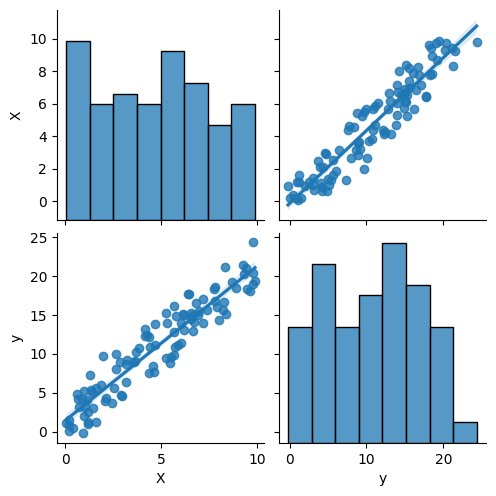

In [13]:
# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(data, kind='reg')
plt.show()

### 2) 등분산성 확인하기

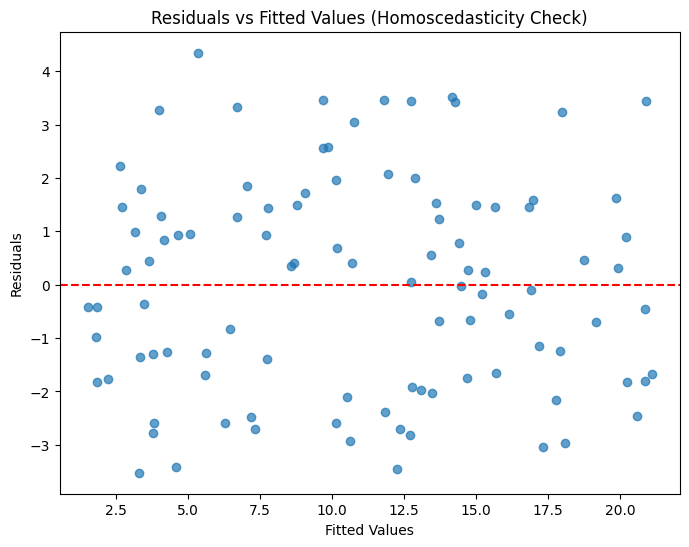

In [14]:
# 등분산성 검증
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
plt.show()

### 3) 정규성 확인하기
- QQ-plot
- shipro

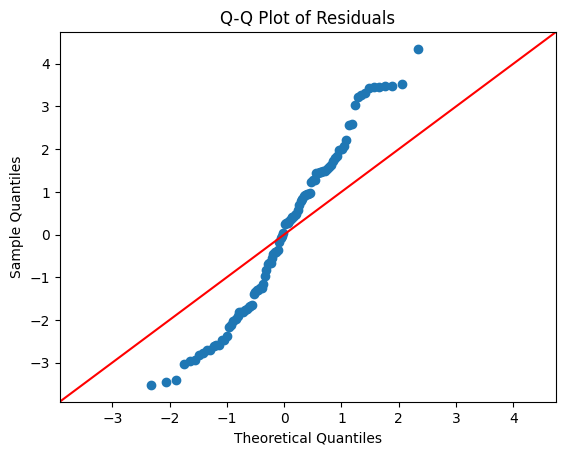

Shapiro-Wilk test statistic: 0.9672574400901794, p-value: 0.013686371967196465


In [15]:
# 정규성 검증 (Q-Q plot)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')

### 3) 독립성 검정하기

In [16]:
# 독립성 검증 (Durbin-Watson 통계량)
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 2.0832252321235347


## 2. 회귀계수 추정하기

### 1) 회귀계수 추정하기

In [43]:
import numpy as np
import pandas as pd

# 데이터 생성
np.random.seed(0)
X = np.random.rand(100) * 10  # 독립변수 X
y = 1 + 2 * X + np.random.normal(0, 1, 100)  # 종속변수 y, 노이즈 추가

# X에 상수항 추가
X_with_const = np.column_stack((np.ones(len(X)), X))

# 회귀계수 추정 공식 적용
beta_hat = np.linalg.inv(X_with_const.T @ X_with_const) @ X_with_const.T @ y

# 결과 출력
print(f"추정된 절편(beta_0): {beta_hat[0]}")
print(f"추정된 기울기(beta_1): {beta_hat[1]}")

추정된 절편(beta_0): 1.2221510774472297
추정된 기울기(beta_1): 1.9936935021402045


추정된 절편(beta_0): 1.2221510774472297
추정된 기울기(beta_1): 1.9936935021402045


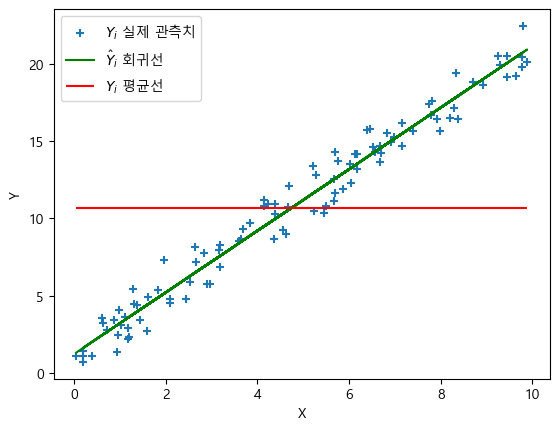

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# 데이터 생성
np.random.seed(0)
X = np.random.rand(100) * 10  # 독립변수 X
y = 1 + 2 * X + np.random.normal(0, 1, 100)  # 종속변수 y, 노이즈 추가

# X에 상수항 추가
X_with_const = np.column_stack((np.ones(len(X)), X))

# 회귀계수 추정 공식 적용
beta_hat = np.linalg.inv(X_with_const.T @ X_with_const) @ X_with_const.T @ y

# 결과 출력
print(f"추정된 절편(beta_0): {beta_hat[0]}")
print(f"추정된 기울기(beta_1): {beta_hat[1]}")



### 2) 잔차 회귀식 그리기

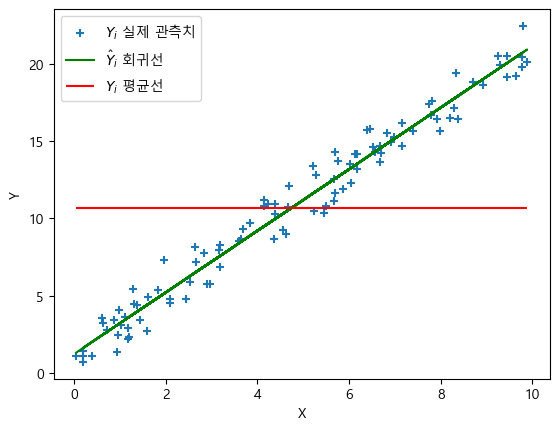

In [52]:
# statsmodels를 사용한 OLS 회귀 모델 적합
model = sm.OLS(y, X_with_const)
results = model.fit()

# 예측값과 잔차 계산
fitted_values = results.fittedvalues  # 예측값
residuals = results.resid  # 잔차

# 실제 관측치, 회귀선, 평균선 시각화
plt.scatter(X, y, marker='+', label='$Y_i$ 실제 관측치')
plt.plot(X, fitted_values, color = 'g', label='$\hat{Y}_i$ 회귀선')
plt.hlines(y.mean(), X.min(), X.max(), color = 'r', label='$Y_i$ 평균선')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()